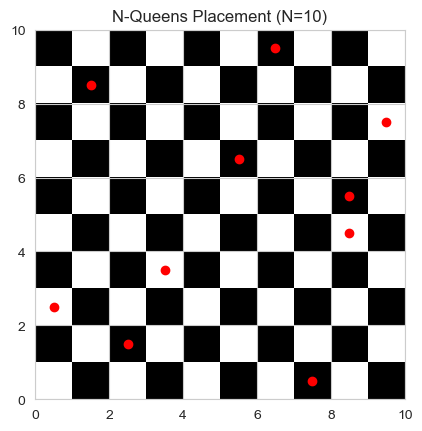

In [5]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

def evaluate(individual):
    conflicts = 0
    for i in range(len(individual) - 1):
        for j in range(i + 1, len(individual)):
            if individual[i] == individual[j] or abs(i - j) == abs(individual[i] - individual[j]):
                conflicts += 1
    return conflicts,

def plot_board(individual):
    N = len(individual)
    board = [['.' for _ in range(N)] for _ in range(N)]

    for i, col in enumerate(individual):
        board[col][i] = 'Q'

    plt.imshow([[1 if (row + col) % 2 == 1 else 0 for col in range(N)] for row in range(N)], cmap='gray', extent=[0, N, 0, N])
    plt.scatter([col + 0.5 for col in individual], [N - row - 0.5 for row in range(N)], marker='o', color='red')
    plt.title(f'N-Queens Placement (N={N})')
    plt.show()

def genetic_algorithm(N, population_size=100, generations=100, crossover_prob=0.8, mutation_prob=0.2):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("gene", random.randint, 0, N-1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, N)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=population_size)
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for generation in range(generations):
        offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)
        fitnesses = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        population[:] = toolbox.select(population + offspring, k=population_size)

    best_ind = tools.selBest(population, k=1)[0]
    plot_board(best_ind)

# Example usage with N=10
genetic_algorithm(N=10)
